# _Tasca 8, Sprint 6_ *Sampling Methods* 

## Level 1 
### Exercise 1

Grab a sports-themed dataset you like. Perform a sampling of the data generating a simple random sample and a systematic sample.

In [1]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

import os

pd.set_option('display.max_columns', None)

In [2]:
print(os.getcwd())

/Users/jalpa/Desktop/DataFun/Course_Generalitat/Notebooks


In [3]:
os.chdir("../Data/Football/")
os.listdir()

['la-liga.csv',
 'mensfootball_results.csv',
 'laliga_player_stats_spanish.csv',
 'La_Liga_Winners.csv.xls',
 'womensfootball_results.csv',
 'laliga_player_stats_english.csv']

In [4]:
sportsdata = pd.read_csv('mensfootball_results.csv')
sportsdata.head(2)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False


In [5]:
sportsdata.shape

(42084, 9)

In [6]:
sportsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42084 entries, 0 to 42083
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        42084 non-null  object
 1   home_team   42084 non-null  object
 2   away_team   42084 non-null  object
 3   home_score  42084 non-null  int64 
 4   away_score  42084 non-null  int64 
 5   tournament  42084 non-null  object
 6   city        42084 non-null  object
 7   country     42084 non-null  object
 8   neutral     42084 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.6+ MB


#### Simple Random Sample

    Simple Random Sample is a randomly selected subset of a population (data). 

In [7]:
random.seed(6)
n = 5
simple_random_sample = sportsdata.sample(n).sort_values(by='date')
simple_random_sample

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
6808,1968-06-08,England,Russia,2,0,UEFA Euro,Rome,Italy,True
7314,1969-11-11,Mexico,Norway,4,0,Friendly,Mexico City,Mexico,False
13295,1984-10-20,Fiji,New Zealand,1,1,Friendly,Suva,Fiji,False
28292,2006-05-21,Basque Country,Wales,0,1,Friendly,Bilbao,Spain,False
28480,2006-08-11,Ethiopia,Kenya,1,0,Friendly,Addis Abeba,Ethiopia,False


#### Systematic Sample

    Systematic Sample is selecting samples from the population by some order, for example, every n^th sample. 

In [8]:
def systematic_sampling(df, step):
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

n = int(len(sportsdata)/5)   
systematic_sample = systematic_sampling(sportsdata, n)

systematic_sample

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
8416,1972-11-24,Guinea,China PR,1,1,Friendly,Conakry,Guinea,False
16832,1992-01-25,Cameroon,Nigeria,1,2,African Cup of Nations,Dakar,Senegal,True
25248,2002-12-23,Burma,Vietnam,2,4,AFF Championship,Jakarta,Indonesia,True
33664,2011-11-11,Nicaragua,Dominica,1,0,FIFA World Cup qualification,Managua,Nicaragua,False
42080,2021-03-31,San Marino,Albania,0,2,FIFA World Cup qualification,Serravalle,San Marino,False


## Level 2
### Exercises 2

It continues with the sports theme data set and generates a stratified sample and a sample using SMOTE (Synthetic Minority Oversampling Technique).

#### Stratified Sample

    - Stratified Sample is generated by dividing the population in subsets (in this case whether they played on a neutral ground or not) and then selecting number of samples from each subset in proportion to the subset size.
    - The neutral here is a TRUE/FALSE column indicating whether the match was played at a neutral venue.
    - There are more FALSE (75%) than TRUE (25%), meaning we want to select more data points with FALSE values and less with TRUE values to avoid sampling bias. This is what stratified sampling does!

In [9]:
sportsdata.neutral.value_counts()

False    31726
True     10358
Name: neutral, dtype: int64

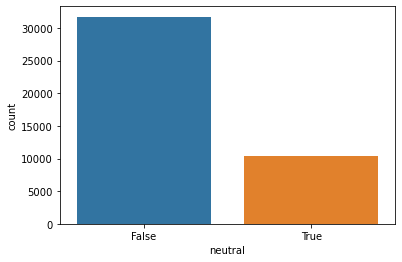

In [10]:
sns.countplot(x="neutral", data=sportsdata)
plt.show()

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

# Set the split criteria (there are 2 criteria: neutral ground or not)
splitby = StratifiedShuffleSplit(n_splits=10, test_size=20)

# Perform data frame split
for x, y in splitby.split(sportsdata, sportsdata['neutral']):
    stratified_random_sample = sportsdata.iloc[y].sort_values(by='neutral')

# View sampled data frame
stratified_random_sample

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
18207,1994-03-09,England,Denmark,1,0,Friendly,London,England,False
23155,2000-07-23,Panama,Canada,0,0,FIFA World Cup qualification,Panama City,Panama,False
20561,1997-06-08,Faroe Islands,Malta,2,1,FIFA World Cup qualification,Toftir,Faroe Islands,False
37861,2016-03-29,Palestine,East Timor,7,0,FIFA World Cup qualification,Hebron,Palestine,False
1652,1934-02-04,Haiti,Cuba,0,6,FIFA World Cup qualification,Port-au-Prince,Haiti,False
7542,1970-08-09,Malaysia,Burma,1,2,Merdeka Tournament,Kuala Lumpur,Malaysia,False
10166,1977-06-08,Sweden,Switzerland,2,1,FIFA World Cup qualification,Solna,Sweden,False
13595,1985-03-27,Germany,Malta,6,0,FIFA World Cup qualification,Saarbrücken,Germany,False
38415,2016-10-11,Malaysia,Afghanistan,1,1,Friendly,Shah Alam,Malaysia,False
20875,1997-10-03,United States,Jamaica,1,1,FIFA World Cup qualification,Washington,United States,False


In [12]:
label = sportsdata.copy()
len(sportsdata.tournament.unique())

112

#### SMOTE Sample

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

x = np.array(sportsdata[['home_score','away_score']])
y = sportsdata.neutral
print(x.shape)
print(y.shape)
counter = Counter(y)
print('Before', counter)

smt = SMOTE()
x_new, y_new = smt.fit_resample(x, y)
counter2 = Counter(y_new)
print('After', counter2)


(42084, 2)
(42084,)
Before Counter({False: 31726, True: 10358})
After Counter({False: 31726, True: 31726})


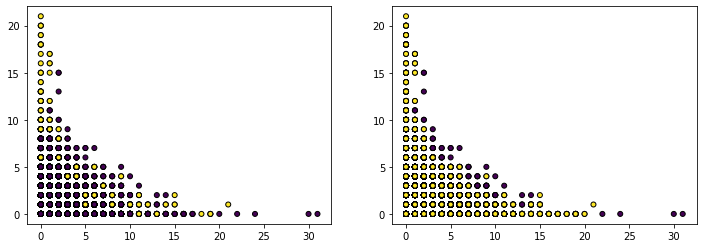

In [14]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.subplot(122)
plt.scatter(x_new[:, 0], x_new[:, 1], marker='o', c=y_new,
            s=25, edgecolor='k')


## Level 3
### Exercises 3

It continues with the sports theme dataset and generates a sample using the Reservoir sampling method.

#### Reservoir Sample

    Reservoir sampling is a randomized algorithm that is used to select k out of n samples; where n is generally very large or is not known. 

In [20]:
import random

input_array = sportsdata.index
n = len(input_array)
k = 5
output = []

for i in range(k):
    output.append(input_array[i])

# Iterating over k to n-1
for j in range(k, n):
    index = random.randint(0, j)
    # Replacing output element with an element in the input
    if index < k:
        output[index] = input_array[j]

#print("Input array:")
#print(input_array)
print("Index values to select a reservoir sample from the data:")
print(output)

reservoir_sample = sportsdata.iloc[output, :]
reservoir_sample.head()

Index values to select a reservoir sample from the data:
[36627, 29575, 9876, 16913, 15212]


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
36627,2014-11-25,United Arab Emirates,Oman,1,0,Gulf Cup,Riyadh,Saudi Arabia,True
29575,2007-09-08,Uganda,Niger,3,1,African Cup of Nations qualification,Kampala,Uganda,False
9876,1976-10-10,Albania,Algeria,3,0,Friendly,Tirana,Albania,False
16913,1992-04-28,Northern Ireland,Lithuania,2,2,FIFA World Cup qualification,Belfast,Northern Ireland,False
15212,1988-11-09,El Salvador,Guatemala,0,0,Friendly,Los Angeles,United States,True


#### Reservoir Sample (alternative method)

In [18]:
class RESERVOIR_SAMPLING():
    def __init__(self, k = 1000):
        self.reservoir = []
        self.k = k
        self.nb_processed = 0

    def add_to_reservoir(self, sample):
        self.nb_processed += 1
        if (self.k >= self.nb_processed):
            self.reservoir.append(sample)
        else:
            j = random.randint(0, self.nb_processed - 1)
            if (j < k):
                self.reservoir[j] = sample


k = 5  #50
samples = sportsdata.index

res = RESERVOIR_SAMPLING(k)
for sample in samples:
    res.add_to_reservoir(sample)

res_indices = res.reservoir
print("Index values to select a reservoir sample from the data:")
print(res_indices)
reservoir_sample = sportsdata.iloc[res_indices, :]
reservoir_sample.head()

Index values to select a reservoir sample from the data:
[2815, 10623, 19204, 37487, 14149]


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
2815,1948-03-14,Belgium,Netherlands,1,1,Friendly,Antwerp,Belgium,False
10623,1978-09-07,Eswatini,Zambia,2,5,Friendly,Lobamba,Eswatini,False
19204,1995-10-22,Cayman Islands,Jamaica,1,5,Friendly,George Town,Cayman Islands,False
37487,2015-11-06,DR Congo,Zambia,3,0,Friendly,Luanda,Angola,True
14149,1986-04-01,Kuwait,Qatar,2,1,Gulf Cup,Riffa,Bahrain,True
